In [126]:
# 导入依赖包
import pandas as pd

In [127]:
import numpy as np

,Class,Alcohol,Malic acid,Attribute,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [128]:
from sklearn import preprocessing

In [129]:
import seaborn as sns

0-1：
 Unnamed: 4最小值为 0.0 Unnamed: 5最小值为 0.0
0-1：
 Unnamed: 4最大值为 1.0 Unnamed: 5最大值为 1.0


In [130]:
import matplotlib.pyplot as plt

z-score标准化后两个指标的最小值：
 Unnamed: 4最小值为 -2.6710181364687173 Unnamed: 5最小值为 -2.0882551982316313
z-score标准化后两个指标的最大值：
 Unnamed: 4最大值为 3.1545107139410433 Unnamed: 5最大值为 4.371372139554768


In [131]:
# 导入数据
wine = pd.read_csv("D:/input/wine.csv")
# 查看前五行
wine.head(5)

0-1标准化后前五行
[[0.25773196 0.61956522]
 [0.03092784 0.32608696]
 [0.41237113 0.33695652]
 [0.31958763 0.4673913 ]
 [0.53608247 0.52173913]]


In [132]:
# 0-1标准化
minmax_scale = preprocessing.MinMaxScaler().fit(wine[['Alcohol','Malic acid']])
np_minmax = minmax_scale.transform(wine[['Alcohol','Malic acid']])

# z-score标准化
std_scale = preprocessing.StandardScaler().fit(wine[['Alcohol','Malic acid']])
np_std = std_scale.transform(wine[['Alcohol','Malic acid']])

z-score标准化后前五行
[[-1.16959318  1.91390522]
 [-2.49084714  0.01814502]
 [-0.2687382   0.08835836]
 [-0.80925118  0.93091845]
 [ 0.45194578  1.28198515]]


In [133]:
# 0-1标准化后，两个特征变量的最小值
print("0-1标准化后两个指标的最小值：\n", "Alcohol最小值为", np_minmax[:, 0].min(), "Malic acid最小值为", np_minmax[:, 1].min())

<Figure size 1000x1000 with 0 Axes>

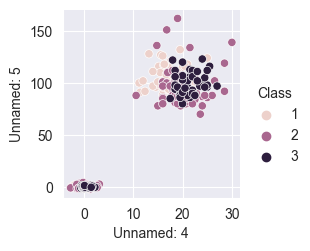

In [134]:
# 0-1标准化后，两个特征变量的最大值
print("0-1标准化后两个指标的最大值：\n", "Alcohol最大值为", np_minmax[:, 0].max(), "Malic acid最大值为", np_minmax[:, 1].max())

<Figure size 1000x1000 with 0 Axes>

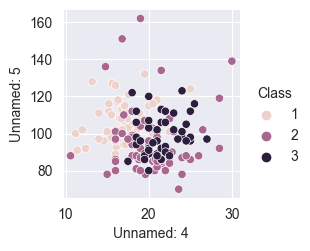

In [135]:
# z-score标准化后，两个特征变量的最小值
print("z-score标准化后两个指标的最小值：\n", "Alcohol最小值为", np_std[:, 0].min(), "Malic acid最小值为", np_std[:, 1].min())

<Figure size 1000x1000 with 0 Axes>

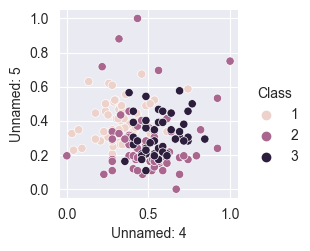

In [136]:
# z-score标准化后，两个特征变量的最大值
print("z-score标准化后两个指标的最大值：\n", "Alcohol最大值为", np_std[:, 0].max(), "Malic acid最大值为", np_std[:, 1].max())

<Figure size 1000x1000 with 0 Axes>

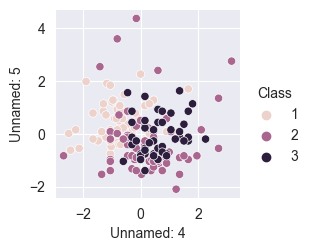

In [137]:
# 0-1标准化后
print("0-1标准化后前五行")
print(np_minmax[0:5,:])

In [138]:
# z-score标准化后
print("z-score标准化后前五行")
print(np_std[0:5,:])

In [139]:
# 获取数据备份
df_minmax = wine.copy()
df_std = wine.copy()
# 将前面标准化后的数据替换进备份
df_minmax[['Alcohol','Malic acid']] = np_minmax
df_std[['Alcohol','Malic acid']] = np_std
# 合并数据集
wine_contrast = pd.concat([wine, df_minmax, df_std], axis=0)

In [122]:
# 创建画布
plt.figure(figsize=(10, 10))
# 指定x轴和y轴的数据集和坐标轴标识
sns.pairplot(hue="Class", data=wine_contrast, x_vars="Alcohol", y_vars="Malic acid")
# 显示图像
plt.show()

In [63]:
# 画出原数据散点图
# 创建画布
plt.figure(figsize=(10, 10))
# 指定x轴和y轴的数据集和坐标轴标识
sns.pairplot(hue="Class", data=wine, x_vars="Alcohol", y_vars="Malic acid")
plt.show()

In [48]:
# 画出0-1标准化后散点图
# 创建画布
plt.figure(figsize=(10, 10))
# 指定x轴和y轴的数据集和坐标轴标识
sns.pairplot(hue="Class", data=df_minmax, x_vars="Alcohol", y_vars="Malic acid")
plt.show()

<Figure size 1000x1000 with 0 Axes>

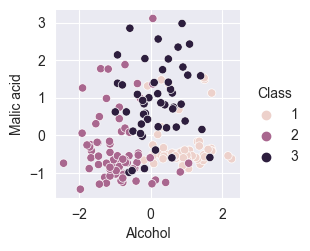

In [24]:
# 画出z-score标准化后的散点图
# 创建画布
plt.figure(figsize=(10, 10))
# 指定x轴和y轴的数据集和坐标轴标识
sns.pairplot(hue="Class", data=df_std, x_vars="Alcohol", y_vars="Malic acid")
plt.show()

In [25]:
# 保存0-1标准化后的数据
df_minmax.to_csv("D:/output/minmax.csv",index = False)

In [26]:
# 保存z-score标准化后的数据
df_std.to_csv("D:/output/std.csv",index = False)